# Synthesizing Sounds

In [7]:
import os
import scipy
import matplotlib.pyplot as plt

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/bethmccarry/anaconda3/lib/python3.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy

# For loading and visualizing audio files
import librosa
import librosa.display

# To play audio
from IPython.display import Audio

# To filter sounds
from scipy.signal import butter, lfilter

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/bethmccarry/anaconda3/lib/python3.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [2]:
audioPath = "../Jaramillo/Sound Files/"
audioClips = os.listdir(audioPath) # List of files in home/Jaramillo/Sound Files

print("No. of .wav files in audio folder = ",len(audioClips))
print(audioClips)

print(type(audioClips))

FileNotFoundError: [Errno 2] No such file or directory: '../Jaramillo/Sound Files/'

In [3]:
# Sound file I want to analyze
audioPath+audioClips[2] # audio_path is a string but audio_clips is a list of strings

NameError: name 'audioClips' is not defined

In [69]:
# Load audio file
data, samplingRate = librosa.load(audioPath+audioClips[2], sr=44100) # Sampling rate is in Hz (standard sample rate for music)
                                  
print(type(data), type(samplingRate))
print(data.shape, samplingRate)

<class 'numpy.ndarray'> <class 'int'>
(139200,) 44100


/Users/bethmccarry/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [53]:
data[0:20]

array([-1.3641357e-02, -1.3153076e-02, -1.2207031e-02, -1.1383057e-02,
       -1.0375977e-02, -9.5825195e-03, -8.4838867e-03, -7.6293945e-03,
       -6.2561035e-03, -5.1574707e-03, -3.9367676e-03, -2.7160645e-03,
       -1.3732910e-03,  6.1035156e-05,  1.3122559e-03,  2.5939941e-03,
        3.8452148e-03,  5.0964355e-03,  6.2866211e-03,  7.4462891e-03],
      dtype=float32)

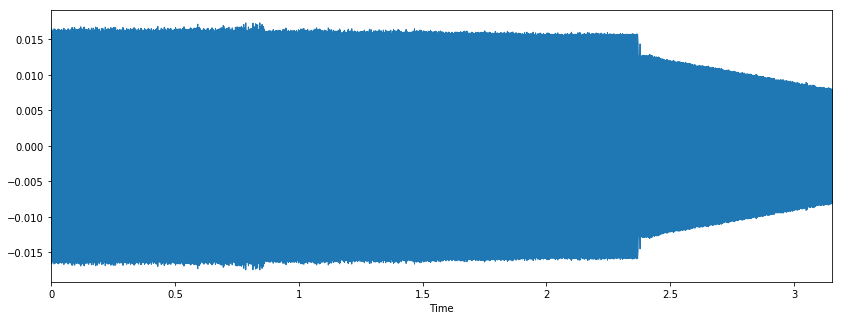

In [81]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=samplingRate) # Plot the amplitude envelope of a waveform.

In [22]:
Audio(data, rate=samplingRate)

### Soft Fourier Transform

Words ...

In [77]:
transformedData = librosa.stft(data)

print(transformedData.shape)
transformedData

(1025, 272)


array([[ 1.9654062e-01+0.00000000e+00j,  9.8856360e-02+0.00000000e+00j,
         1.3278314e-03+0.00000000e+00j, ...,
         2.4998793e-03+0.00000000e+00j, -2.3195999e-04+0.00000000e+00j,
        -1.6647251e-02+0.00000000e+00j],
       [-1.9629259e-01-1.38777878e-17j,  9.9570851e-04-9.79521722e-02j,
        -4.6623200e-03+3.43370513e-04j, ...,
         5.1740259e-03+3.38807539e-03j, -4.3838667e-03-6.71525020e-03j,
         7.4821408e-03-9.96043999e-03j],
       [ 1.9776468e-01-1.38777878e-17j, -9.7659960e-02+2.10646322e-04j,
         3.3146916e-03-8.46736878e-03j, ...,
        -1.7314183e-02-2.10442618e-02j,  4.1733459e-03+1.74556226e-02j,
         1.2372418e-02-2.93365330e-03j],
       ...,
       [ 8.4258930e-04-1.38777878e-17j, -5.8652501e-04-1.50107808e-04j,
         4.1731269e-04+2.47005140e-04j, ...,
        -1.2358105e-04-2.62708403e-04j,  2.2011709e-04+1.56847982e-05j,
        -1.5970923e-04+1.22413461e-04j],
       [-1.0161725e-03+4.16333634e-17j, -2.6685735e-05+3.58730438e-0

### Converting amplitude to dB

To convert from amplitude to sound decibels for plotting spectrograms, we take each value of the array and plug it into 

dB = max(20 * log$_{10}$(value))

In [78]:
# Convert an amplitude spectrogram to dB-scaled spectrogram.
transformedDataInDB = librosa.amplitude_to_db(abs(transformedData)) 

print(transformedDataInDB.shape)
transformedDataInDB

(1025, 272)


array([[-14.130954, -20.099907, -57.53714 , ..., -52.041622, -62.022057,
        -35.57315 ],
       [-14.141922, -20.17927 , -46.604465, ..., -44.173733, -41.917023,
        -38.091286],
       [-14.077025, -20.20565 , -40.82581 , ..., -31.292206, -34.919884,
        -37.913357],
       ...,
       [-61.48768 , -62.022057, -62.022057, ..., -62.022057, -62.022057,
        -62.022057],
       [-59.86065 , -62.022057, -62.022057, ..., -62.022057, -62.022057,
        -62.022057],
       [-59.46581 , -62.022057, -62.022057, ..., -62.022057, -62.022057,
        -62.022057]], dtype=float32)

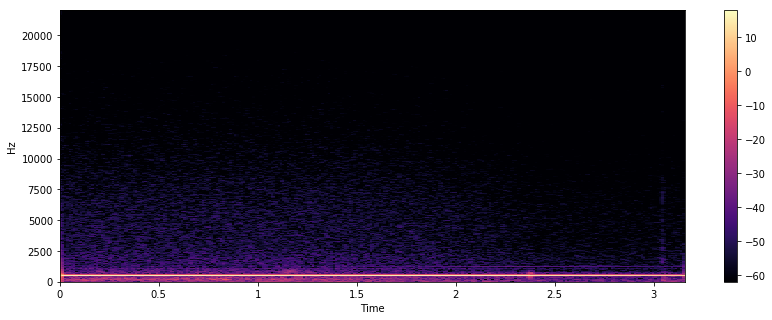

In [79]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(transformedDataInDB, sr=samplingRate, x_axis='time', y_axis='hz')
plt.colorbar()

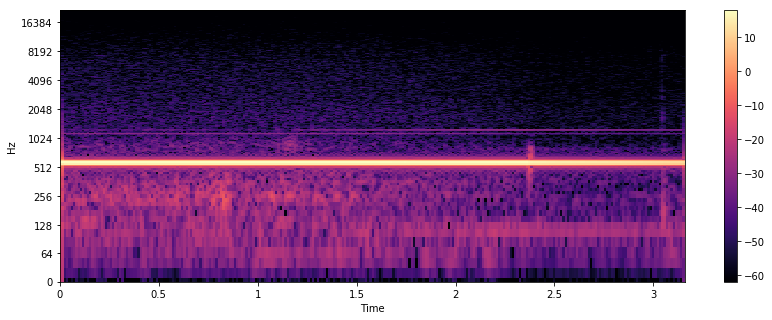

In [80]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(transformedDataInDB, sr=samplingRate, x_axis='time', y_axis='log')
plt.colorbar()

In [1]:
fs = 4000
lowcut = 20.0
highcut = 50.0

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

order = 2

In [2]:
b, a = butter(order, [low, high], btype='band')

NameError: name 'butter' is not defined